## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  刘鑫
+ 学号  0165221

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [21]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [23]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df = pd.DataFrame(df)

D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


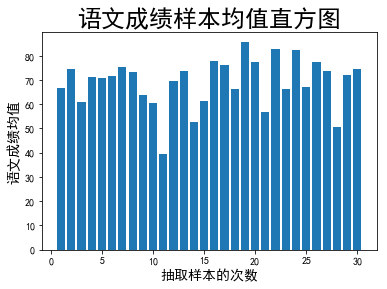

In [22]:
y=[]
for i in range(30):             #均值计算重复三十次
    df=df.sample(n=1000, frac=None, replace=False,  weights=None, random_state=None, axis=None)   
                                #随机选取1000个样本
    df=pd.DataFrame(df)
    x1=df.stdchn                #挑选语文成绩这一变量
    for x2 in x1:               #将Dataframe转化为list
        x2=x2.strip()           #去除空白字符
        if x2=="":              #去除缺失值
            continue
        x=[]
        x2=float(x2)            #将变量类型转化为float
        x.append(x2)
    x=pd.DataFrame(x)
    y.append(x.mean())          #将样本均值添加到一个变量当中
y1=[]
for y2 in y:
    y1.append(float(y2))
y1
x1=range(1,31)
x1
plt.bar(x1, y1)
 
# 设置图表标题并给坐标轴加上标签
# 设置刻度标记的大小
plt.title('语文成绩样本均值直方图', fontsize=24)
plt.xlabel('抽取样本的次数', fontsize=14)
plt.ylabel('语文成绩均值', fontsize=14)
plt.show()

In [5]:
y=pd.DataFrame(y)               #将list转化为dataframe
print(y.mean())                 #计算样本均值的均值
print(y.std())                  #计算样本均值的标准差（标准误）

0    71.682619
dtype: float64
0    9.267597
dtype: float64


D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


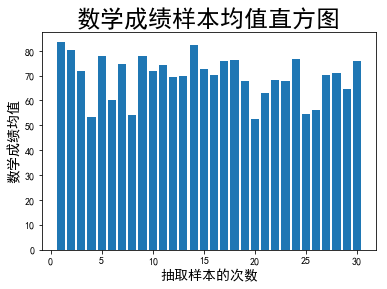

In [6]:
#第二个变量选取为数学成绩，操作流程与代码与上一题大致相同
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df = pd.DataFrame(df)

y=[]
for i in range(30):
    df=df.sample(n=1000, frac=None, replace=False,  weights=None, random_state=None, axis=None)
    df=pd.DataFrame(df)
    x1=df.stdmat
    for x2 in x1:
        x2=x2.strip()
        if x2=="":
            continue
        x=[]
        x2=float(x2)
        x.append(x2)
    x=pd.DataFrame(x)
    y.append(x.mean())
y1=[]
for y2 in y:
    y1.append(float(y2))
y1
x1=range(1,31)
x1
plt.bar(x1, y1)
 
# 设置图表标题并给坐标轴加上标签
# 设置刻度标记的大小
plt.title('数学成绩样本均值直方图', fontsize=24)
plt.xlabel('抽取样本的次数', fontsize=14)
plt.ylabel('数学成绩均值', fontsize=14)
plt.show()

In [7]:
y=pd.DataFrame(y)          #将list转化为dataframe
print(y.mean())           #计算样本均值的均值
print(y.std())            #计算样本均值的标准差（标准误）

0    69.53311
dtype: float64
0    8.740688
dtype: float64


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [24]:
#取 c12（孩子的成绩）做因变量y
#取 “b2501(和妈妈的关系)” 、“b2502(和爸爸的关系)”、“b2801（和父母吃饭的频率）”，“b29(你觉得父母为你做的多嘛)”
#做自变量x0、x1、x2、x3
sentinels = {'c12': [' '], 'b2501': [' '], 'b2502': [' '], 'b2801': [' '],'b29': [' ']}
#定义缺失值
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df = pd.DataFrame(df)
data=pd.DataFrame({"x0":df.b2501,"x1":df.b2502,"x2":df.b2801,"x3":df.b29,'y':df.c12})
data=data.dropna(axis=0,how='any')        #删除存在缺失值的行
print(data)                                      #输出所有数据

        x0   x1   x2   x3    y
0      3.0  3.0  6.0  5.0  4.0
1      3.0  3.0  6.0  5.0  4.0
2      2.0  2.0  6.0  5.0  3.0
3      3.0  3.0  6.0  5.0  2.0
4      3.0  3.0  6.0  3.0  4.0
5      3.0  3.0  6.0  5.0  3.0
6      3.0  3.0  6.0  4.0  3.0
7      3.0  3.0  6.0  4.0  5.0
8      2.0  2.0  6.0  5.0  4.0
9      3.0  2.0  6.0  5.0  3.0
10     2.0  3.0  6.0  5.0  1.0
11     3.0  2.0  6.0  4.0  4.0
12     3.0  3.0  6.0  5.0  3.0
13     3.0  3.0  3.0  5.0  3.0
14     3.0  3.0  6.0  5.0  5.0
15     2.0  2.0  6.0  4.0  1.0
16     3.0  3.0  6.0  5.0  3.0
17     3.0  3.0  6.0  5.0  4.0
18     3.0  3.0  6.0  4.0  2.0
19     3.0  2.0  6.0  3.0  1.0
20     3.0  1.0  6.0  5.0  3.0
21     3.0  3.0  5.0  5.0  4.0
22     3.0  3.0  6.0  4.0  3.0
23     3.0  3.0  5.0  4.0  3.0
24     3.0  3.0  6.0  5.0  4.0
25     2.0  2.0  6.0  4.0  5.0
26     3.0  3.0  6.0  5.0  2.0
27     2.0  3.0  6.0  4.0  4.0
28     2.0  2.0  6.0  2.0  2.0
29     3.0  3.0  6.0  5.0  1.0
...    ...  ...  ...  ...  ...
19457  3

D:\ProgramData\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,174,175,176,177,179,180,181,182,183,184,188,191,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
X=data.values
y=np.asarray(y)
print(X)
type(y)

[[ 3.  3.  6.  5.  4.]
 [ 3.  3.  6.  5.  4.]
 [ 2.  2.  6.  5.  3.]
 ..., 
 [ 3.  3.  6.  4.  2.]
 [ 3.  3.  6.  5.  1.]
 [ 3.  2.  6.  5.  1.]]


numpy.ndarray

In [12]:
#构建解释变量
model_x= ['x0','x1','x2','x3']
X = data.loc[ :,model_x].values
#构建被解释变量
y=data['y'].values
print(X)
print(y)

[[ 3.  3.  6.  5.]
 [ 3.  3.  6.  5.]
 [ 2.  2.  6.  5.]
 ..., 
 [ 3.  3.  6.  4.]
 [ 3.  3.  6.  5.]
 [ 3.  2.  6.  5.]]
[ 4.  4.  3. ...,  2.  1.  1.]


In [16]:
import statsmodels.api as sm
model = sm.OLS(y, X)    #拟合普通最小二乘回归
results = model.fit()
results = model.fit()
results.rsquared   #可决系数

0.87794482023014164

In [14]:
results.params  #各变量系数

array([ 0.34137058,  0.14045916,  0.18041447,  0.16601342])

In [15]:
print(results.summary())#输出打印所有结果

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 3.427e+04
Date:                Tue, 25 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:48:01   Log-Likelihood:                -29494.
No. Observations:               19059   AIC:                         5.900e+04
Df Residuals:                   19055   BIC:                         5.903e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3414      0.019     18.266      0.0

In [ ]:
（一）模型拟合指标
    取 c12（孩子的成绩）做被解释变量
    取 “b2501(和妈妈的关系)” 、“b2502(和爸爸的关系)”、“b2801（和父母吃饭的频率）”、
“b29(你觉得父母为你做的多嘛)”,解释变量x1、x2、x3、x4
    探究父母与孩子之间的关系、互动频率、和孩子对父母的看法对孩子的
成绩是否存在影响.

In [ ]:
（二）模型的显著性检验结果
     可决系数为0.878，说明模型解释的变差占总变差的比例较高，表明父母与孩子之间的关系、
互动频率、和孩子对父母的看法对孩子的成绩有较强的解释力，模型拟合结果较好。

In [ ]:
（三）变量的系数
    x1的系数为0.3414，x2的系数为0.1405，x3的系数为0.1804，x4的系数为0.1660
说明解释变量与被解释变量之间成正相关。

In [ ]:
（四）各系数的显著性检验结果
    x1,x2,x3,x4的p值均等于0，拒绝原假设，即认为四个变量对孩子成绩都存在影响

In [ ]:
（五）对模型结果的解释
    （1）由于所选取的变量都是选项越靠后代表的程度越大的变量，likert量表可以近似看作连续变量，
所以此模型未经过哑变量编码处理。
    （2）Jarque-Bera检验的P值接近于0，表明选取的数据服从正态分布。
    （3）Durbin-Watson检验的值为1.727，表明残差服从正态分布，各变量之间是相互独立的，不存在自相关。
    （4）线性回归模型为y=0.3414x1+0.1405x2+0.1804x3+0.1660x4+e
    （5）对线性回归模型的解释：x1每变动一个单位，被解释变量变动0.0.3414单位；x2每变动一个单位，
被解释变量变动0.0.1405个单位；x3每变动一个单位，被解释变量变动0.1804个单位;x4每变动一个单位，被
解释变量变动0.1660个单位。

In [ ]:
（六）得出的初步结论和建议
    （1）在四个因素当中，x1的解释能力最强，孩子妈妈的关系对孩子的成绩影响最大。
    （2）与家庭成员的关系的好坏，会直接影响孩子的成绩。
    （3）数据表明，在学校成绩表现优异的孩子，绝大多数都有着一个良好的家庭环境和氛围。
    （4）想要改良孩子的成绩，可以考虑从改良家庭环境，营造家庭氛围的角度反思和入手。